In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pyod.models.iforest import IForest
import numpy as np
from sklearn.metrics import classification_report

import stumpy


from sklearn.metrics import accuracy_score

import warnings
from pyod.utils.data import evaluate_print
from sklearn.preprocessing import StandardScaler

from scipy.stats import ConstantInputWarning

warnings.simplefilter("ignore", ConstantInputWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="Local min features equals local max features; use all features instead.")
warnings.filterwarnings("ignore", category=UserWarning, message="Local min features smaller than 1, increasing to 1.0")
warnings.filterwarnings("ignore", category=UserWarning, message="The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.")


In [2]:
df = pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /dataset/cleaned.csv")


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [4]:
scaler = StandardScaler()
X = df[['value']].values
X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X).flatten()
X=X_scaled

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


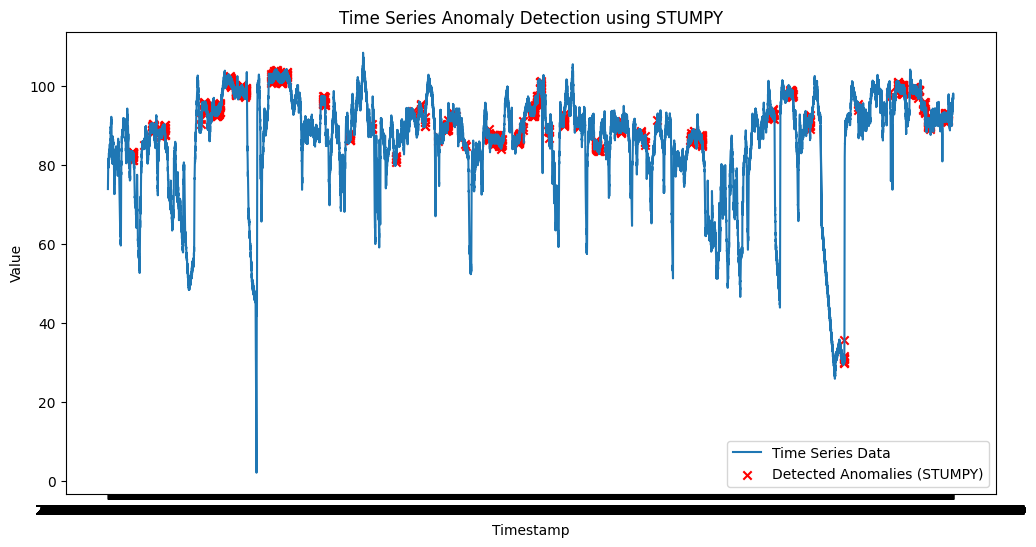

In [5]:
window_size = 50

matrix_profile = stumpy.stump(T_A=X, m=window_size)

mp_distances = matrix_profile[:, 0]  

threshold = np.percentile(mp_distances, 95)

detected_anomalies = np.where(mp_distances >= threshold)[0]

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

plt.scatter(df['timestamp'][detected_anomalies + window_size], df['value'][detected_anomalies + window_size], 
            color='red', marker='x', label='Detected Anomalies (STUMPY)')

plt.title('Time Series Anomaly Detection using STUMPY')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

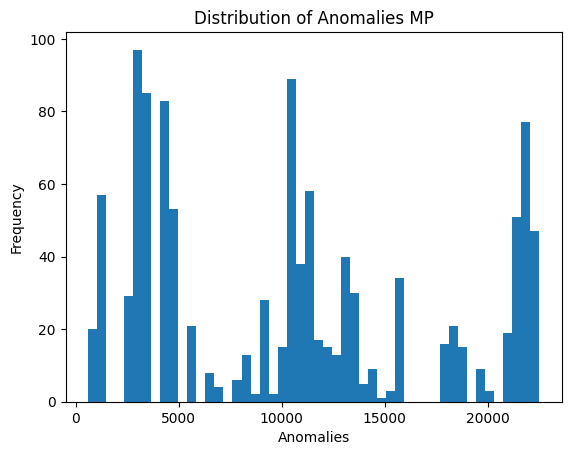

In [6]:
plt.hist(detected_anomalies, bins=50)
plt.xlabel('Anomalies')
plt.ylabel('Frequency')
plt.title('Distribution of Anomalies MP')
plt.show()